In [1]:
import numpy as np
import pandas as pd
import ipywidgets as widgets

from ipywidgets import interact, interactive, fixed, interact_manual
from utilities.visualisation import *

In [2]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

In [3]:
%%html
<style>

div.output_scroll {
    height : auto;
}
</style>

In [6]:
trs = [0.2, 0.3, 0.4, 0.5]
ts = [100,150]

# Select threshold
## Ramps

In [85]:
def vis_int(t):
    vis = DataFrameVisualization.from_path('/media/francesco/saetta/krock-dataset/slope/csvs/test.csv', time_window=t)
    vis.plot_advancement()
interact(vis_int, t=ts)

interactive(children=(Dropdown(description='t', options=(100, 150), value=100), Output()), _dom_classes=('widg…

<function __main__.vis_int(t)>

## Bumps

In [88]:
def vis_int(t):
    vis = DataFrameVisualization.from_path('/media/francesco/saetta/krock-dataset/tr/csvs/test.csv', time_window=t)
    vis.plot_advancement()
interact(vis_int, t=ts)

interactive(children=(Dropdown(description='t', options=(100, 150), value=100), Output()), _dom_classes=('widg…

<function __main__.vis_int(t)>

# Datasets
## Statistics

In [94]:
visualizations = {
    'train': DataFrameVisualization.from_root('/media/francesco/saetta/krock-dataset/train/csvs/'),
    'val': DataFrameVisualization.from_root('/media/francesco/saetta/krock-dataset/val/csvs/'),
    'test': DataFrameVisualization.from_root('/media/francesco/saetta/krock-dataset/test/csvs/')
}

In [97]:
def vis_dataset(name, tr, t):
    vis = visualizations[name]
    vis.add_advancement(t)
    vis.df = vis.df[vis.df['advancement'] >= 0]
    vis.df = vis.df[vis.df['advancement'] < 1]
    vis.show_classes(tr)

interact(vis_dataset, name=visualizations.keys(), tr=trs, t=ts)

interactive(children=(Dropdown(description='name', options=('train', 'val', 'test'), value='train'), Dropdown(…

<function __main__.vis_dataset(name, tr, t)>

## Different maps
We can explore the advancament on different training maps

In [79]:
clusters = meta2clusters('/media/francesco/saetta/krock-dataset/train/meta.csv')

/home/francesco/Documents/Master-Thesis/core/utilities/visualisation/utils.py:14: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  df = pd.concat(dfs)


In [80]:
def vis_clusters(name, tr, t):
    vis = DataFrameVisualization(clusters[name], time_window=t)
    vis.df = vis.df[vis.df['advancement'] >= 0]
    vis.df = vis.df[vis.df['advancement'] < 1]

    vis.plot_advancement_box()
    vis.show_classes(tr)

interact(vis_clusters, name=clusters.keys(), tr=trs, t=ts)

interactive(children=(Dropdown(description='name', options=('bumps0', 'bumps0-rocks0', 'bumps0-rocks1', 'bumps…

<function __main__.vis_clusters(name, tr, t)>

In [114]:
def vis_dataset(name, tr, t):
    vis = DataFrameVisualization.from_root('/media/francesco/saetta/krock-dataset/{}/csvs/'.format(name), time_window=t)
    vis.df = vis.df[vis.df['advancement'] >= 0]
    vis.df = vis.df[vis.df['advancement'] < 1]

    vis.plot_advancement_box()
    vis.show_classes(tr)

interact(vis_dataset, name=visualizations.keys(), tr=trs, t=ts)

interactive(children=(Dropdown(description='name', options=('train', 'val', 'test'), value='train'), Dropdown(…

<function __main__.vis_dataset(name, tr, t)>

# Maximum advancement on flat ground

In [7]:
def vis_dataset(t):
    vis = DataFrameVisualization.from_root('/media/francesco/saetta/flat/csvs_patches/',  time_window=t)
    print(max(vis.df['advancement']))
    vis.plot_advancement_box()


interact(vis_dataset, t=ts)

interactive(children=(Dropdown(description='t', options=(100, 150), value=100), Output()), _dom_classes=('widg…

<function __main__.vis_dataset(t)>

# Temp
use to visualize on the fly some dataset

<IPython.core.display.Javascript object>


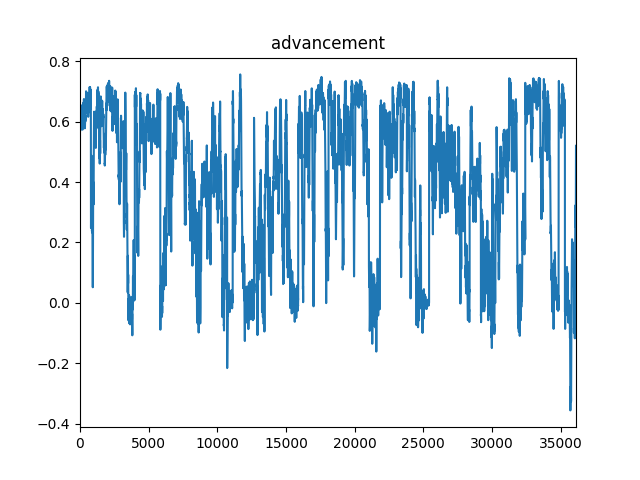

<IPython.core.display.Javascript object>


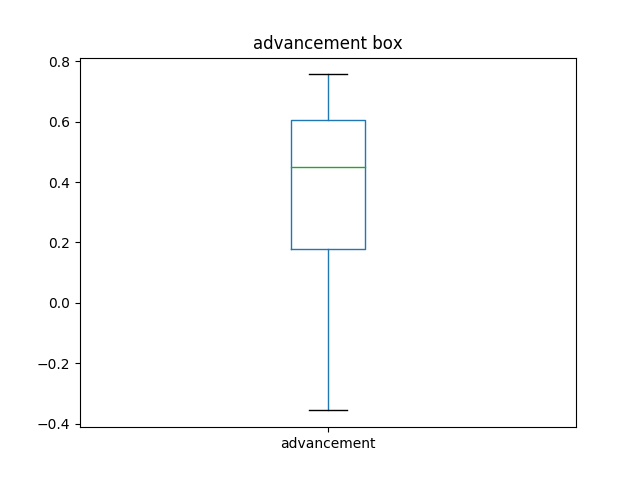

<IPython.core.display.Javascript object>


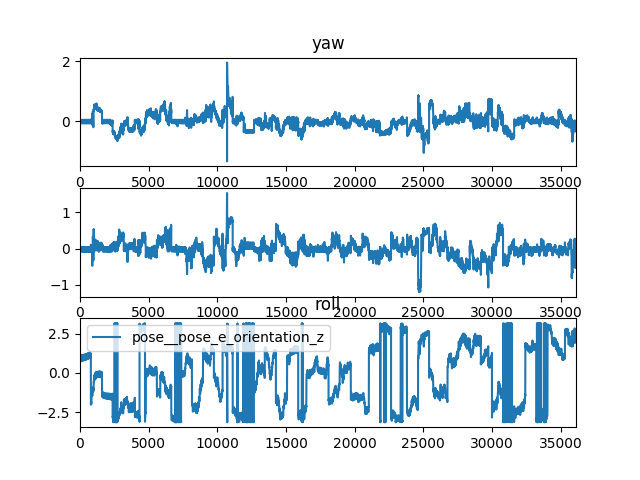

<IPython.core.display.Javascript object>


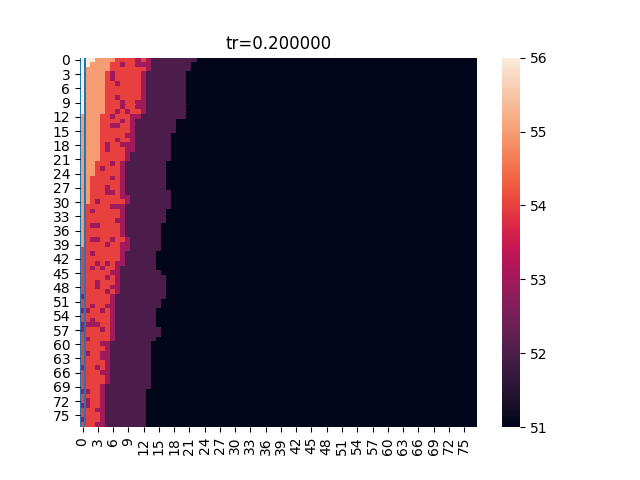

In [8]:
    vis = DataFrameVisualization.from_root('/media/francesco/saetta/krock-dataset/new-test-random/csvs/', time_window=100)
    vis(0.2)


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
from utilities.postprocessing.handlers.functional import read_image

<IPython.core.display.Javascript object>


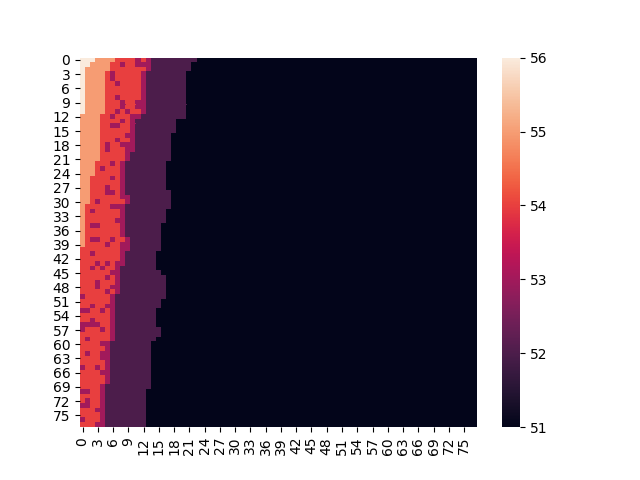

In [13]:
fig = plt.figure()
hm = read_image('/media/francesco/saetta/krock-dataset/new-test-random/patches/0.71/querry-big-10-10-1558293308.877082-13.png')
sns.heatmap(hm)

<IPython.core.display.Javascript object>


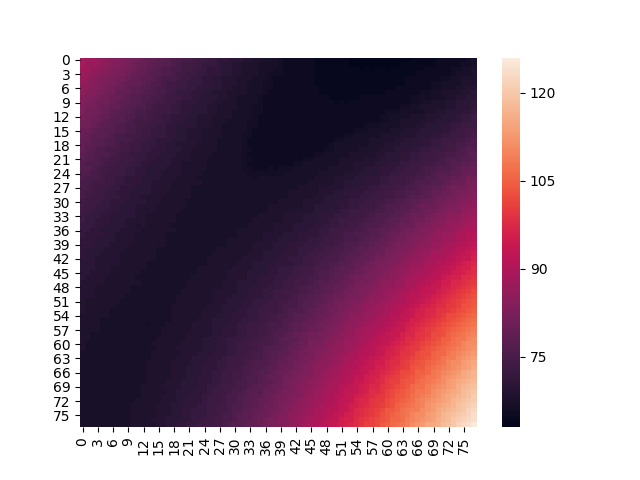

In [73]:
from utilities.patches import *
import cv2 

fig = plt.figure()
hm = read_image('/media/francesco/saetta/krock-dataset/train/patches/0.71/bumps0-2-1558007105.485-277.png')
sns.heatmap(hm)

<IPython.core.display.Javascript object>


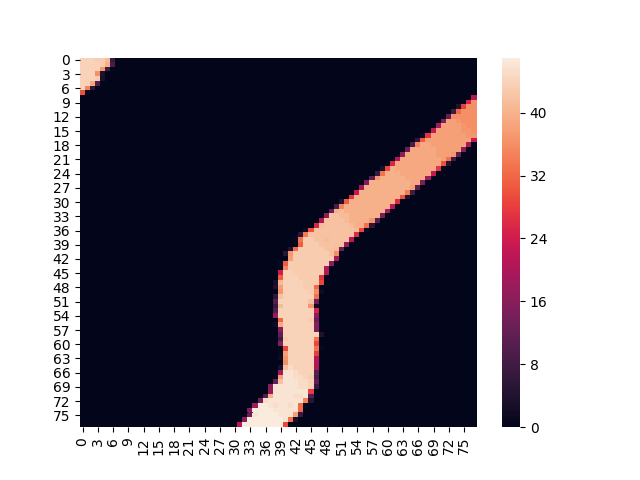

(78, 78)


In [90]:
fig = plt.figure()
hm = read_image('/media/francesco/saetta/krock-dataset/train/patches/0.71/bars1-1-1558017877.997997-92.png')
# hm = cv2.resize(hm, (8,8))
print(hm.shape)
# hm = cv2.resize(hm, (76,76))
sns.heatmap(hm)

In [160]:
class RandomCoarsening():
    def __init__(self, p):
        self.factors = np.linspace(16, 128, 29, dtype=np.int)
        self.p = p

    def __call__(self, x):
        original_shape = x.shape
        if np.random.random() > (1.0 - self.p):
            shape = np.random.choice(self.factors)
            x = cv2.resize(x, (shape, shape))
            x = cv2.resize(x, original_shape)
        return x

In [147]:
r = RandomCoarsening(0.8)

In [104]:
%%timeit
xxx = r(hm.copy().astype(np.float) / 255)

31.5 µs ± 1.71 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [118]:
x = r(hm.copy().astype(np.float) / 255)

<IPython.core.display.Javascript object>


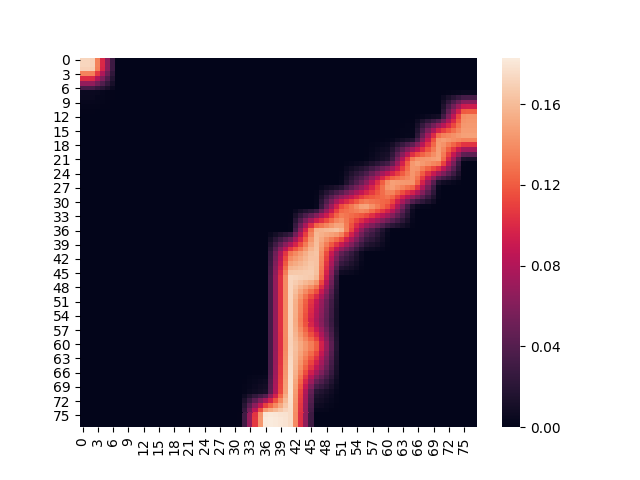

In [171]:
fig = plt.figure()
# hm = cv2.resize(hm, (8,8))
x = r(hm.copy().astype(np.float) / 255)
sns.heatmap(x)

In [182]:
8 * np.linspace(2, 12, 11) 

array([16., 24., 32., 40., 48., 56., 64., 72., 80., 88., 96.])

In [174]:
4 * np.linspace(3, 7, 5, dtype=np.int)

array([12, 16, 20, 24, 28])